In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('home_price.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_x=sx.fit_transform(df.drop('price',axis='columns'))
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))


In [5]:
w=np.ones(shape=(3))
w

array([1., 1., 1.])

In [10]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_fetures=X.shape[1]
    w=np.ones(shape=(number_of_fetures))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,X.T)+b
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        if(i%10==0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [11]:
w

array([0.70712464, 0.67456527])

In [16]:
def predict(area,bedroom,w,b):
    scaled_x=sx.transform([[area,bedroom]])[0]
    scaled_price=w[0]*scaled_x[0]+w[1]*scaled_x[1]
    price=sy.inverse_transform([[scaled_price]])[0][0]
    return price

predict(1000,2,w,b)

c:\Users\vishe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


61.35015200429238

Stochastic Gardient descent

In [19]:
import random
random.randint(0,6)

5

In [22]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_fetures=X.shape[1]
    w=np.ones(shape=(number_of_fetures))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        if(i%10==0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list



wsgd,bsgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
wsgd,bsgd,cost_sgd

(array([0.70828775, 0.67652471]), -0.23183053034357287, 0.7500746642974784)

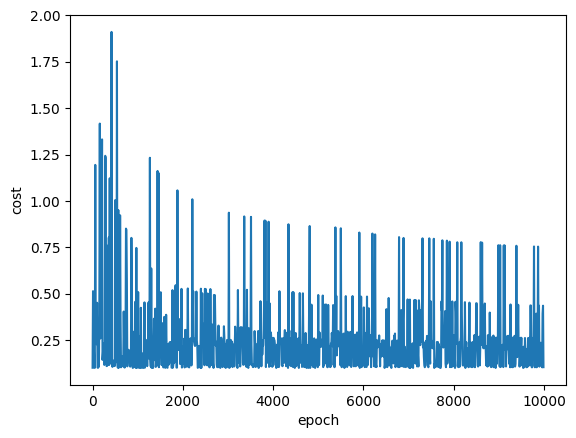

In [24]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples)

In [ ]:
def mini_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_fetures=X.shape[1]
    w=np.ones(shape=(number_of_fetures))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index=np.random.permutation(total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index:]
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)
        w=w-learning_rate*w_grad
        b=b-learning_rate*b_grad
        cost=np.mean(np.square(y_true-y_predicted))
        if(i%10==0):
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list



wsgd,bsgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
wsgd,bsgd,cost_sgd